In [1]:
#imported packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
%matplotlib inline

print("packages imported")

packages imported


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Problem Statement

Model the total sleep duration of 374 people using linear regression, given the number of minutes engaged in physical activity, self-reported stress level (1-10), and self-reported sleep quality (1-10).

# Variables and Parameters

| Symbol | Description | Type | Dimension | Units |
|---|---|---|---|---|
| $Y$ | The total number of hours slept | dependent variable | $T$ | hours |
| $B_0$ | The default sleeping duration $d$ | parameter | $T$ | hours |
| $B_1$ | Regression coefficient for physical activity | parameter | $T$ | hours/minutes |
| $X_1$ | The number of minutes (minutes) engaged in physical activity during the day | independent variable | $T$ | minutes |
| $B_2$ | Regression coefficient for stress level | parameter | $T$ | hours |
| $X_2$ | The (self-reported) stress level experienced | independent variable | 1 |  |
| $B_3$ | Regression coefficient for quality of sleep | parameter | $T$ | hours |
| $X_3$ | The (self-reported) quality of sleep reported on a scale of 1 to 10 | independent variable | 1 |  |
| $\epsilon$ | residual | parameter | $T$ | hours |


# Assumptions and Constraints:

- Other variables that affect sleep duration, such as timezone, room temperature, and diet, are constant.
- Assume that the data comes from 374 people of working age with no sleep-related diseases.
- No other variables affect sleep duration


# Building the Solution:

In [3]:
sleep_data = pd.read_csv('drive/MyDrive/Sleep.csv')
sleep = pd.DataFrame(sleep_data)
sleep.head()
np.max(sleep['Physical_Activity'])

90

# $\text{Stress}^2 \text{and Quality}^2 \text{and Duration}^2$

In [4]:
# Transformation of Stress^2 and Quality^2
sleepTransformed = sleep.copy()
sleepTransformed['Stress'] = sleepTransformed['Stress']**2
sleepTransformed['Quality'] = sleepTransformed['Quality']**2
sleepTransformed['Duration'] = sleepTransformed['Duration']**2
X = sleepTransformed[['Physical_Activity','Quality','Stress']]
Y = sleepTransformed['Duration']
X = sm.add_constant(X)
reg = sm.OLS(Y, X).fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:               Duration   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     477.6
Date:                Sun, 30 Nov 2025   Prob (F-statistic):          8.03e-127
Time:                        19:39:37   Log-Likelihood:                -1143.7
No. Observations:                 374   AIC:                             2295.
Df Residuals:                     370   BIC:                             2311.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                22.7046      2.69

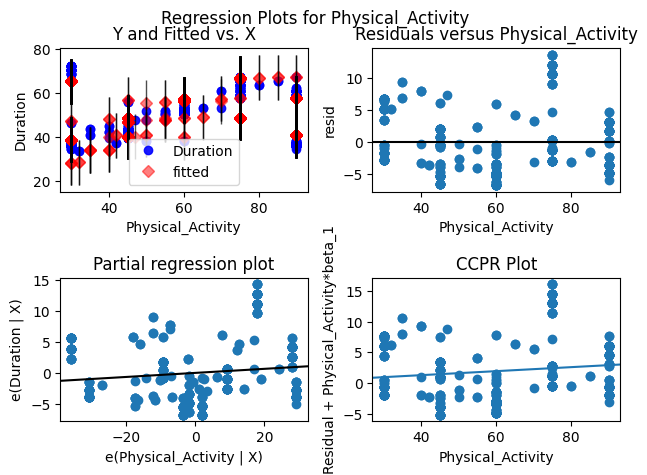

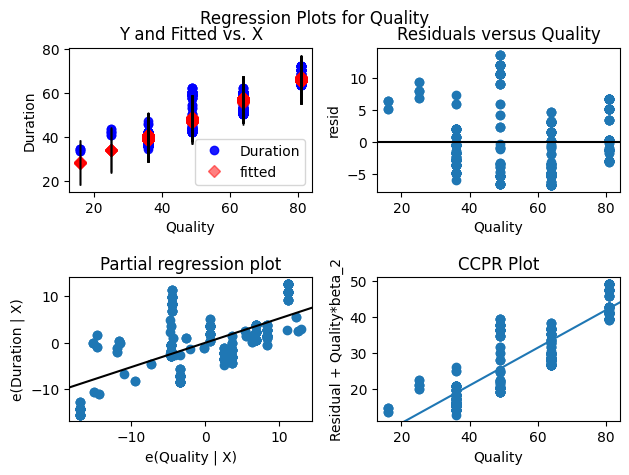

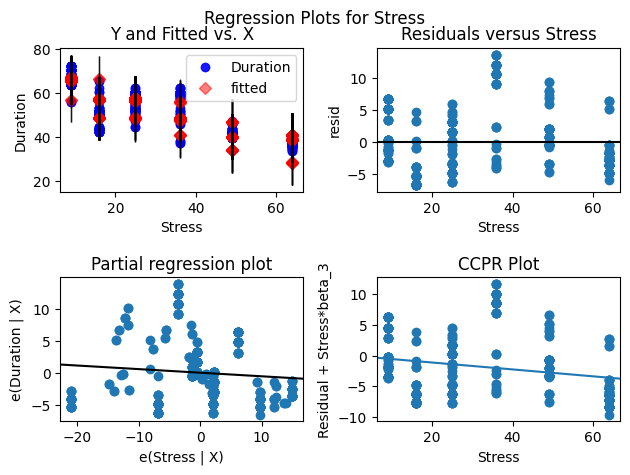

In [5]:
#Assumption: average value of the error is zero.
sm.graphics.plot_regress_exog(reg,"Physical_Activity")
plt.show()

sm.graphics.plot_regress_exog(reg,"Quality")
plt.show()

sm.graphics.plot_regress_exog(reg,"Stress")
plt.show()

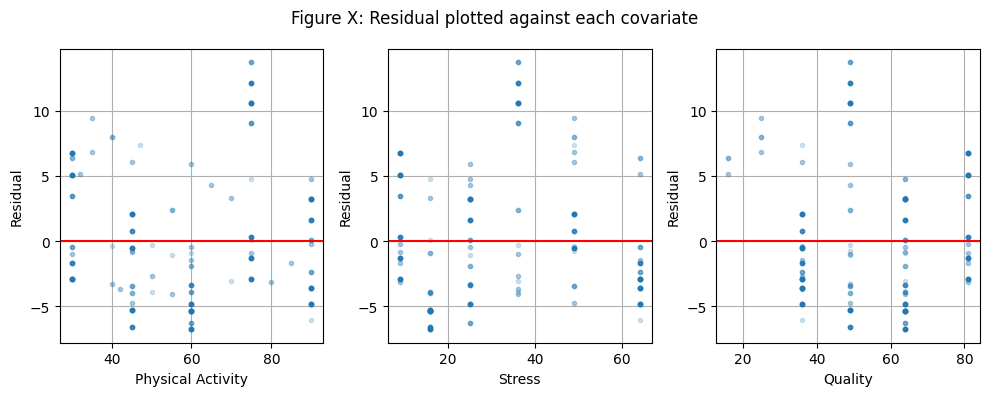

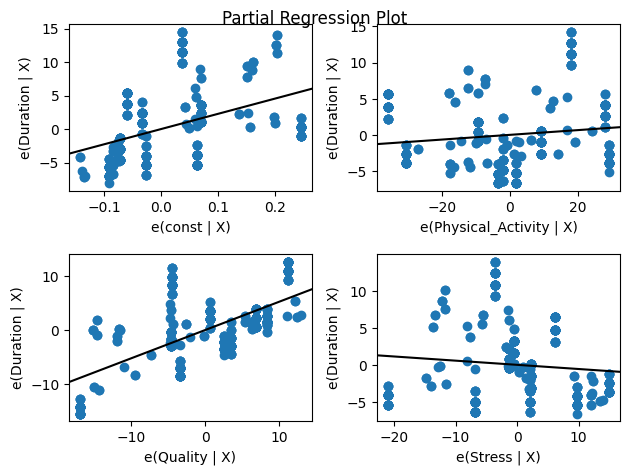

In [6]:
# Assumption: Average value of the error is zero.
betas = reg.params
residuals = Y - (betas.iloc[0] + betas.iloc[1]*X['Physical_Activity'] + betas.iloc[2]*X['Quality'] + betas.iloc[3]*X['Stress'])
fig, axes = plt.subplots(1, 3, figsize=(10,4))

def residualPlot(ax, var, label):
    ax.plot(var, residuals, '.', alpha=0.2), ax.grid(True)
    ax.set_xlabel(label), ax.set_ylabel('Residual')
    ax.axhline(y=0, color='r')

residualPlot(axes[0], X['Physical_Activity'], 'Physical Activity')
residualPlot(axes[1], X['Stress'], 'Stress')
residualPlot(axes[2], X['Quality'], 'Quality')

plt.suptitle('Figure X: Residual plotted against each covariate')
plt.tight_layout()
plt.show()
## can just have all the partial regression plots together using:
## partial regression plots
sm.graphics.plot_partregress_grid(reg)
plt.show()

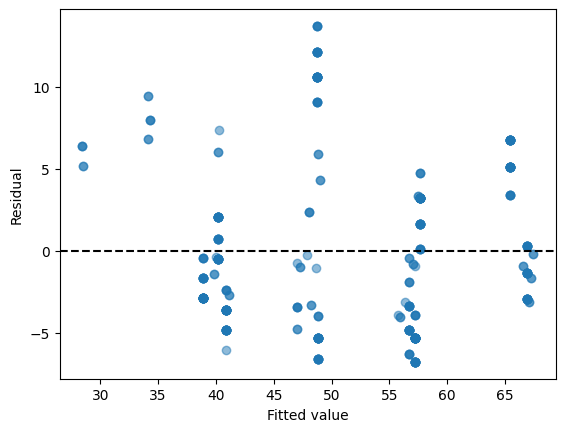

In [8]:
# Assumption variance is constant
fitted_y = reg.fittedvalues

residuals = reg.resid

plt.scatter(fitted_y,residuals,alpha=0.5)
plt.axhline(y=0,color='k',linestyle = '--')
plt.xlabel('Fitted value')
plt.ylabel('Residual')
plt.show()

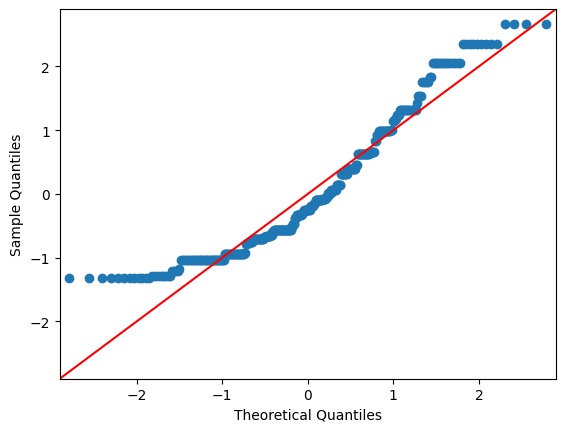

In [9]:
# Assumption: Errors are normally distributed
sm.qqplot(residuals, fit=True, line="45")
plt.show()

# Analysis and Assessment: